In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras

import numpy as np 
import pandas as pd
import glob
import cv2
import os
from pathlib import Path
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D
from keras.layers import MaxPooling2D, Dropout,Flatten
from keras import backend as K
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.xception import preprocess_input
from keras.layers import Input, Conv2D, Dense, concatenate
from keras.models import Model


In [4]:
data_dir = Path('/content/COVID Splitaug2') # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
test_dir = os.path.join(data_dir, 'Test')
#test_dir2 = os.path.join(data_dir, 'Test2')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
#test_malaria_dir2 = os.path.join(test_dir2, 'COVID') #Replace the folder names
#test_uninfected_dir2 = os.path.join(test_dir2, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
##test_malaria_fnames2 = os.listdir(test_malaria_dir2)
#test_uninfected_fnames2 = os.listdir(test_uninfected_dir2)


print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))
print("Test Covid", len(test_malaria_fnames))
print("Test Noncovid", len(test_uninfected_fnames))



955
60
1170
58
Test Covid 98
Test Noncovid 105


In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255
                                   #preprocessing_function=tf.keras.applications.densenet.preprocess_input
                                  )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(224, 224)
                                                    )
validation_datagen = ImageDataGenerator(rescale=1./255
                                        #preprocessing_function=tf.keras.applications.densenet.preprocess_input
                                        )
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [23]:
from keras.optimizers import Adam
inp = tf.keras.layers.Input(shape=(224,224,3))
#first module
conv11 = tf.keras.layers.Conv2D(16, kernel_size=(3, 3), 
                               activation=tf.keras.activations.swish, padding='same')(inp)

conv12 = tf.keras.layers.Conv2D(16, kernel_size=(7, 7), 
                               activation=tf.keras.activations.swish, padding='same')(inp)

x = concatenate([conv11, conv12])
layer = tf.keras.activations.swish(x)
conv1 = tf.keras.layers.Conv2D(16, kernel_size=(1, 1), 
                               activation=tf.keras.activations.swish, padding='same', strides=(2,2))(layer)
conv13 = tf.keras.layers.Conv2D(32, kernel_size=(5, 5), 
                               activation=tf.keras.activations.swish, padding='same', strides=(2,2))(conv1)
batch1 = tf.keras.layers.BatchNormalization()(conv13)         
#second module
conv21 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation=tf.keras.activations.swish, padding='same')(batch1)

conv22 = tf.keras.layers.Conv2D(32, kernel_size=(7, 7), 
                               activation=tf.keras.activations.swish, padding='same')(batch1)
x2 = concatenate([conv21, conv22])
layer2 = tf.keras.activations.swish(x2)
conv2 = tf.keras.layers.Conv2D(32, kernel_size=(1, 1), 
                               activation=tf.keras.activations.swish, padding='same', strides=(2,2))(layer2)
conv23 = tf.keras.layers.Conv2D(64, kernel_size=(5, 5), 
                               activation=tf.keras.activations.swish, padding='same', strides=(2,2))(conv2)
batch2 = tf.keras.layers.BatchNormalization()(conv23) 



#end of modules
flat = tf.keras.layers.Flatten()(batch2)
hidden1 = tf.keras.layers.Dense(1024, activation=tf.keras.activations.swish)(flat)
batch6 = tf.keras.layers.BatchNormalization()(hidden1)
drop1 = tf.keras.layers.Dropout(rate=0.5)(batch6)
#hidden2 = tf.keras.layers.Dense(32, activation=tf.keras.activations.ReLU)(drop1)

#drop2 = tf.keras.layers.Dropout(rate=0.5)(batch6)

out = tf.keras.layers.Dense(2, activation='softmax')(drop1)

model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(optimizer= tf.keras.optimizers.Adam(lr =0.00001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 224, 224, 16) 448         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 224, 224, 16) 2368        input_4[0][0]                    
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 224, 224, 32) 0           conv2d_18[0][0]                  
                                                                 conv2d_19[0][0]       

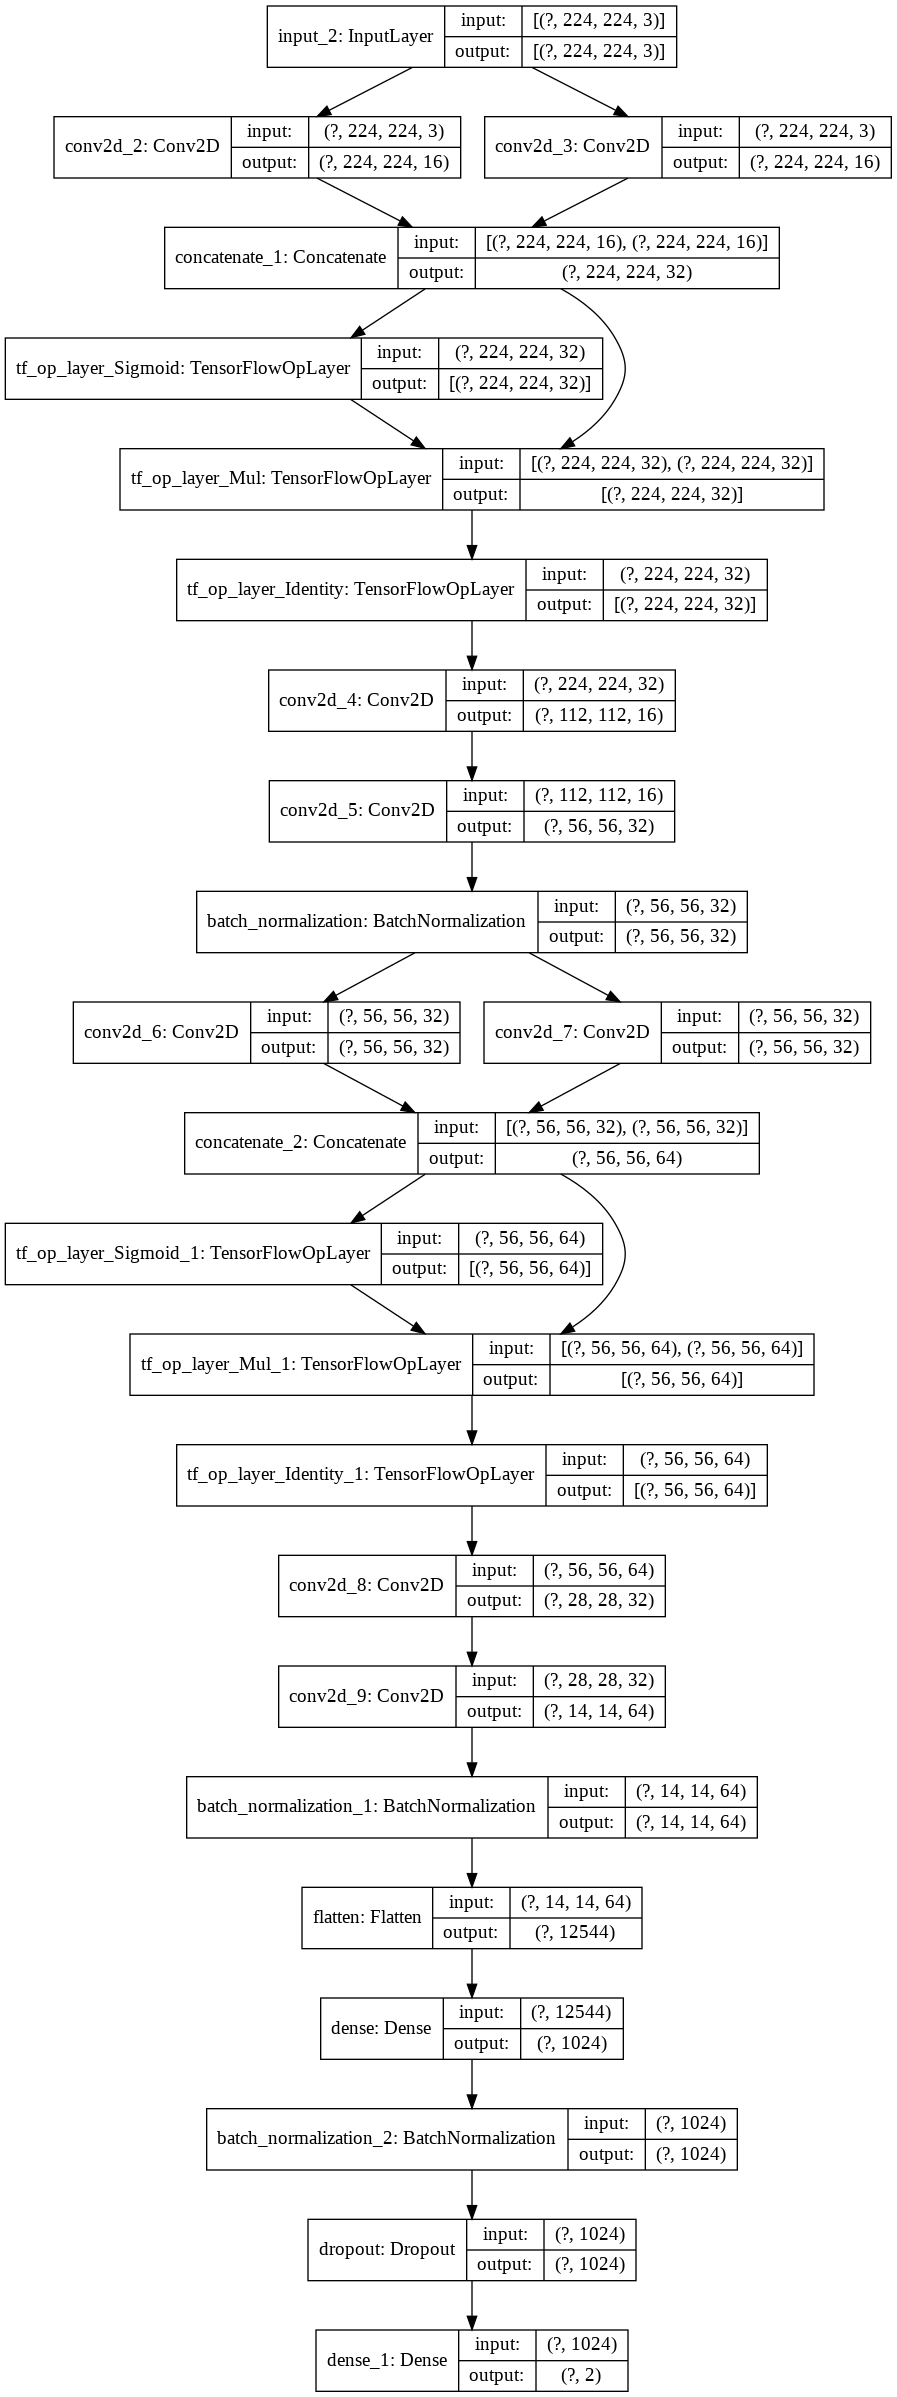

In [8]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
   
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#from google.colab import files
#plt.savefig("model.png")
#files.download("model.png")


In [14]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=1
)
#history = model.fit(
            #x=X_train, y=y_train, 
             #       batch_size=16,
              #      epochs=50, 
               #     validation_data=(X_val , y_val),callbacks = [early],
            #
            #verbose=1
        #)
history = model.fit_generator(train_generator,
            validation_data = validation_generator,
            epochs = 25, #callbacks = [early]
            )

Epoch 1/25
133/133 [==============================] - 76s 575ms/step - loss: 0.7166 - accuracy: 0.7280 - val_loss: 0.7013 - val_accuracy: 0.5085
Epoch 2/25
133/133 [==============================] - 76s 571ms/step - loss: 0.4895 - accuracy: 0.8127 - val_loss: 0.7491 - val_accuracy: 0.5085
Epoch 3/25
133/133 [==============================] - 77s 575ms/step - loss: 0.3296 - accuracy: 0.8616 - val_loss: 0.6391 - val_accuracy: 0.5847
Epoch 4/25
133/133 [==============================] - 76s 571ms/step - loss: 0.2530 - accuracy: 0.9059 - val_loss: 0.4834 - val_accuracy: 0.7458
Epoch 5/25
133/133 [==============================] - 76s 571ms/step - loss: 0.2238 - accuracy: 0.9073 - val_loss: 0.3449 - val_accuracy: 0.8644
Epoch 6/25
133/133 [==============================] - 76s 574ms/step - loss: 0.1958 - accuracy: 0.9242 - val_loss: 0.2825 - val_accuracy: 0.9153
Epoch 7/25
133/133 [==============================] - 78s 587ms/step - loss: 0.1916 - accuracy: 0.9205 - val_loss: 0.3111 - val_ac

In [15]:

data_dir = Path('/content/COVID Splitaug2')
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [16]:

testGenerator = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_dir, 
                                                      batch_size=8,
                                                    class_mode='categorical',shuffle=False,target_size=(224,224)
                                                      )

Found 203 images belonging to 2 classes.


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
batch_size = 16
num_of_test_samples = 203
predictions = model.predict_generator(testGenerator)

y_pred = np.argmax(predictions, axis=1)

true_classes = testGenerator.classes

class_labels = list(testGenerator.class_indices.keys())   

print(class_labels)

print(confusion_matrix(testGenerator.classes, y_pred))

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

['COVID', 'NON-COVID']
[[87 11]
 [10 95]]
              precision    recall  f1-score   support

       COVID       0.90      0.89      0.89        98
   NON-COVID       0.90      0.90      0.90       105

    accuracy                           0.90       203
   macro avg       0.90      0.90      0.90       203
weighted avg       0.90      0.90      0.90       203



In [18]:
from sklearn.metrics import  f1_score,roc_auc_score, accuracy_score
f1_score(testGenerator.classes, y_pred)

0.9004739336492891

In [19]:
roc_auc_score(testGenerator.classes, y_pred)

0.8962585034013605

In [20]:
accuracy_score(testGenerator.classes, y_pred)

0.896551724137931

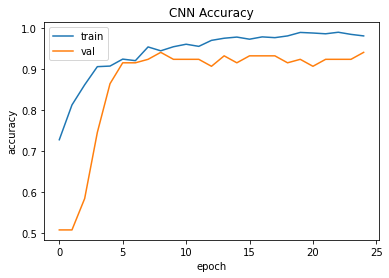

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('densenetaccwes.png')
#from google.colab import files
#plt.savefig("densenetaccwes.png")
#files.download("densenetaccwes.png")
plt.show()

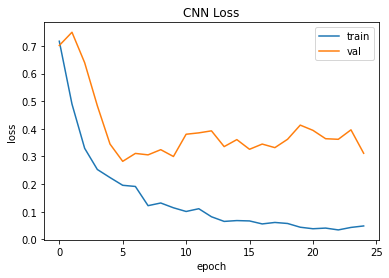

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

#plt.savefig('densenetlosswes.png')
#from google.colab import files
#plt.savefig("densenetlosswes.png")
#files.download("densenetlosswes.png")
plt.show()